# A/B Testing Assignment

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import math
from statistics import mean

### Import the [Absenteeism at Work data set](https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Absenteeism_at_work.csv). 

**Note:** The the delimiter of the file is a semi-colon (;), so you will need to set `sep=';`.

In [ ]:
absenteeism = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Absenteeism_at_work.csv', sep=';')

## Confidence Intervals

Suppose this company is analyzing the health of its employees and is specifically interested in their Body Mass Index (BMI). Generate a 95% confidence interval of the mean for that field.

In [ ]:
absenteeism.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [ ]:
bmi_ci = stats.t.interval(0.95, len(absenteeism['Body mass index'])-1, absenteeism['Body mass index'].mean(), scale=stats.sem(absenteeism['Body mass index']))


In [ ]:
absenteeism['Body mass index'].describe()

count    740.000000
mean      26.677027
std        4.285452
min       19.000000
25%       24.000000
50%       25.000000
75%       31.000000
max       38.000000
Name: Body mass index, dtype: float64

### Visualizing Confidence Intervals

Generate a sampling distribution of the mean for the Body Mass Index field. Create a histogram to visualize the sampling distribution and add an indicator showing the lower and upper bounds of the confidence interval.

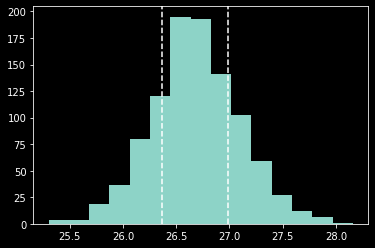

In [ ]:
bmi_means = [absenteeism.sample(100, replace=True)['Body mass index'].mean() for i in range(1000)]
plt.axvline(bmi_ci[0], linestyle='dashed')
plt.axvline(bmi_ci[1], linestyle='dashed')

plt.hist(bmi_means, 15)
plt.show()

### Confidence Intervals by Group

Suppose we wanted to examine whether there was a difference in the BMIs of employees who drink socially and those that do not. Use the Social Drinker field to split the employees into groups, and then compute the confidence intervals for each group. What insights can you derive from the results?

In [ ]:
drinker_bmi = absenteeism[(absenteeism['Social drinker'] == 1)]
sober_bmi = absenteeism[(absenteeism['Social drinker'] == 0)]

drinker_ci = stats.t.interval(0.95, len(drinker_bmi['Body mass index'])-1, drinker_bmi['Body mass index'].mean(), scale=stats.sem(drinker_bmi['Body mass index']))
sober_ci = stats.t.interval(0.95, len(sober_bmi['Body mass index'])-1, sober_bmi['Body mass index'].mean(), scale=stats.sem(sober_bmi['Body mass index']))

print(f'The 95% confidence interval for BMI of social drinkers is {drinker_ci}')
print(f'The 95% confidence interval for BMI of non social drinkers is {sober_ci}')

The 95% confidence interval for BMI of social drinkers is (27.49904991718434, 28.27714055900614)
The 95% confidence interval for BMI of non social drinkers is (24.641171070136533, 25.533828929863464)


### Sampling Distributions for Each Group

Next, let's generate a sampling distribution of the mean for each group and generate a plot containing both of their histograms to see if there is any overlap.

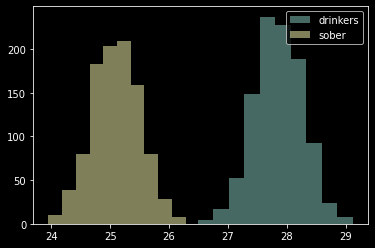

In [ ]:
drinker_means = [drinker_bmi.sample(100, replace=True)['Body mass index'].mean() for i in range(1000)]
sober_means = [sober_bmi.sample(100, replace=True)['Body mass index'].mean() for i in range(1000)]
plt.hist(drinker_means, alpha = .5)
plt.hist(sober_means, alpha=.5)

plt.style.use(['dark_background'])
plt.legend(['drinkers', 'sober'], loc='upper right')
plt.show()

## A/B Testing

Based on our analysis so far, we would like to perform a t-test to determine whether there is a difference in BMI means between our two groups (social drinkers and non-social drinkers). Conduct an independent sample t-test and determine whether the differences between the groups is statistically significant. What is your conclusion?

In [ ]:
print(stats.describe(drinker_bmi['Body mass index']))
print(stats.describe(sober_bmi['Body mass index']))
stats.ttest_ind(drinker_bmi['Body mass index'], sober_bmi['Body mass index'])

DescribeResult(nobs=420, minmax=(21, 38), mean=27.88809523809524, variance=16.45284123195818, skewness=0.3735851245472099, kurtosis=-0.399599534553416)
DescribeResult(nobs=320, minmax=(19, 36), mean=25.0875, variance=16.468808777429466, skewness=0.36665152710023935, kurtosis=-0.34978840250660115)


Ttest_indResult(statistic=9.302990833389606, pvalue=1.5203894201359724e-19)

Based on our t-statistic and low p-value, we can reject the null hypothesis. This finding is statistically significant.

## Confidence Intervals for Group Differences

Generate a 95% confidence interval for the mean difference in BMI between the two groups. Compute the interval using both the traditional method and bootstrapping and compare the results. What conclusions can you draw from the comparison? How would you present a summary of your results to stakeholders?

In [ ]:
def get_list_95_ci(data1, data2):
    '''
    Calculates the difference in means at the 95% confidence interval
    
    Args: Two samples being tested
    '''
    sample_1_n = len(data1)
    sample_2_n = len(data2)
    sample_1_mean = mean(data1)
    sample_2_mean = mean(data2)
    sample_1_var = np.var(data1)
    sample_2_var = np.var(data2)
    mean_diff = sample_2_mean - sample_1_mean
    std_err_diff = math.sqrt((sample_1_var/sample_1_n) + (sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_diff
    ci_lower = mean_diff - margin_of_error
    ci_upper = mean_diff + margin_of_error
    return(f'The difference in means at the 95% confidence interval (two-tail) is between {round(ci_lower, 4)} and {round(ci_upper, 4)}')


print('Traditional method: ', get_list_95_ci(drinker_bmi['Body mass index'], sober_bmi['Body mass index']))
print('Bootstrapping method: ', get_list_95_ci(drinker_bmi_means, sober_bmi_means))

Traditional method:  The difference in means at the 95% confidence interval (two-tail) is between -3.3898 and -2.2113
Bootstrapping method:  The difference in means at the 95% confidence interval (two-tail) is between -2.8165 and -2.7469


The results from the traditional method tell us with 95% confidence that the difference between bmi means for drinkers and non-drinkers is between 2.2 and 3.4. When we use bootstrapping to atrificially enlarge our sample, we see that, with 95% confidence, the bmi mean difference is between 2.7 and 2.8.